<a href="https://colab.research.google.com/github/VanKoh01/us-dba-02/blob/main/regresion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

# Regresion Lineal (Horas de sueño - Km corridos)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Datos de entrenamiento: [Km, Edad, Sexo]
# Sexo: 0 = Mujer, 1 = Hombre
X = [
    [5.0, 22, 1], [5.0, 30, 0], [5.0, 40, 1], [5.0, 48, 0],
    [10.0, 20, 1], [10.0, 25, 0], [10.0, 38, 1], [10.0, 45, 0],
    [10.0, 50, 1], [8.0, 33, 0], [9.5, 36, 1], [6.0, 44, 0]
]

# Horas de sueño correspondientes (etiquetas)
y = [7, 8, 6, 7, 9, 10, 7.5, 8.5, 7.2, 8, 9.3, 7.8]

In [ ]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X,y)

LinearRegression()

In [ ]:
# Predecir horas de sueño para una persona que corrió 10km, tiene 28 años y es hombre
prediccion = modelo_lineal.predict([[10.0, 28, 1]])

In [ ]:
print(f"Predicción de horas de sueño: {prediccion[0]:.2f}")

Predicción de horas de sueño: 8.60


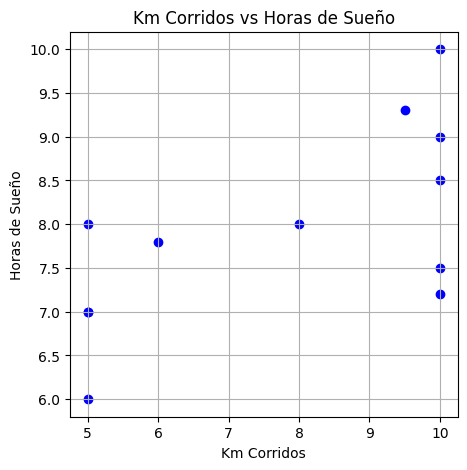

In [ ]:
import matplotlib.pyplot as plt
km = [[fila[0]] for fila in X]
hrs = y

plt.figure(figsize=(5,5))
plt.scatter(km, hrs, color="blue")
plt.title('Km Corridos vs Horas de Sueño')
plt.xlabel('Km Corridos')
plt.ylabel('Horas de Sueño')
plt.grid(True)
plt.show()



Regresión Lógica

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
y_logica = [1 if valor > 8 else 0 for valor in y] # Se convierten las horas de sueño en clases: 1 si duerme >8 horas, 0 en caso contrario


In [ ]:
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X, y_logica)


LogisticRegression()

In [ ]:
prediccion_logica = modelo_logistico.predict([[10.0, 28, 1]])
print("¿Duerme más de 8 horas?:", "Sí" if prediccion_logica[0] == 1 else "No")

¿Duerme más de 8 horas?: Sí


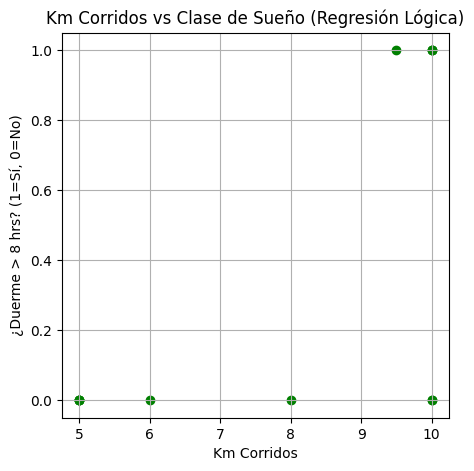

In [ ]:
 #Gráfica simple Km vs Clase
km_valores = [fila[0] for fila in X]
plt.figure(figsize=(5,5))
plt.scatter(km_valores, y_logica, color="green")
plt.title('Km Corridos vs Clase de Sueño (Regresión Lógica)')
plt.xlabel('Km Corridos')
plt.ylabel('¿Duerme > 8 hrs? (1=Sí, 0=No)')
plt.grid(True)
plt.show()

Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=0)
modelo_arbol.fit(X, y_logica)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Predicción con los mismos datos de prueba
prediccion_arbol = modelo_arbol.predict([[10.0, 28, 1]])
print("Árbol de decisión - ¿Duerme más de 8 horas?:", "Sí" if prediccion_arbol[0] == 1 else "No")

Árbol de decisión - ¿Duerme más de 8 horas?: Sí


In [ ]:
from sklearn.tree import export_text
estructura = export_text(modelo_arbol, feature_names=["Km", "Edad", "Sexo"])
print("\nEstructura del árbol:\n")
print(estructura)


Estructura del árbol:

|--- Km <= 8.75
|   |--- class: 0
|--- Km >  8.75
|   |--- Edad <= 37.00
|   |   |--- class: 1
|   |--- Edad >  37.00
|   |   |--- Sexo <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sexo >  0.50
|   |   |   |--- class: 0



Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Entrenamos un bosque aleatorio
modelo_bosque = RandomForestClassifier(n_estimators=100, random_state=0)
modelo_bosque.fit(X, y_logica)

RandomForestClassifier(random_state=0)

In [ ]:
prediccion_bosque = modelo_bosque.predict([[10.0, 28, 1]])
print("Random Forest - ¿Duerme más de 8 horas?:", "Sí" if prediccion_bosque[0] == 1 else "No")

Random Forest - ¿Duerme más de 8 horas?: Sí


In [ ]:
from sklearn.metrics import accuracy_score

# Precisión (accuracy) con los datos de entrenamiento
arbol_acc = accuracy_score(y_logica, modelo_arbol.predict(X))
bosque_acc = accuracy_score(y_logica, modelo_bosque.predict(X))

print(f"Precisión del Árbol de Decisión: {arbol_acc*100:.1f}%")
print(f"Precisión del Random Forest: {bosque_acc*100:.1f}%")

Precisión del Árbol de Decisión: 100.0%
Precisión del Random Forest: 100.0%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


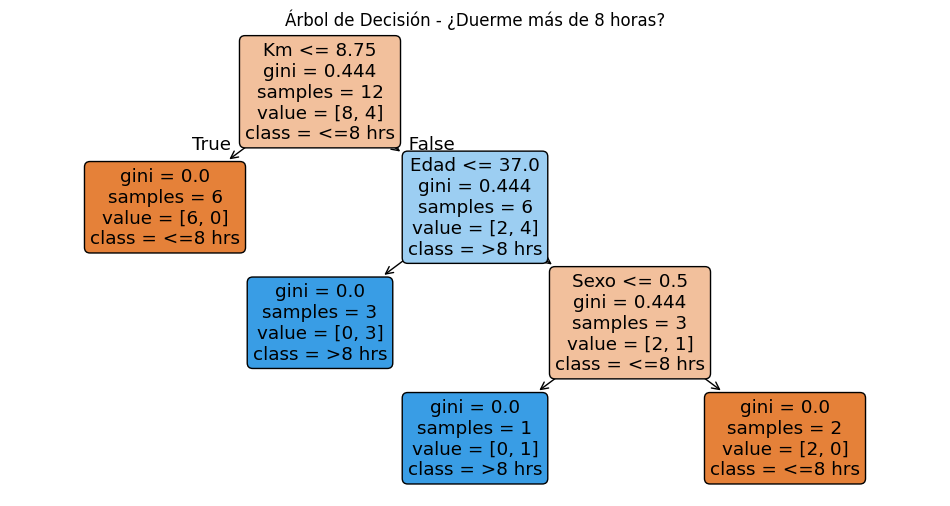

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(modelo_arbol,
          feature_names=["Km", "Edad", "Sexo"],
          class_names=["<=8 hrs", ">8 hrs"],
          filled=True, rounded=True)
plt.title("Árbol de Decisión - ¿Duerme más de 8 horas?")
plt.show()